In [55]:
import pandas as pd
from pathlib import Path
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
import geoviews as gv
from holoviews import opts

In [50]:
# File to Load
df = pd.read_csv('park_data_clean.csv')
print(df.head())


    national_park date_established  visitors  \
0          Acadia       1919-02-26   4069098   
1  American Samoa       1988-10-31      8495   
2          Arches       1971-11-12   1806865   
3        Badlands       1978-11-10   1224226   
4        Big Bend       1944-06-12    581220   

                                         description           state  \
0  Covering most of Mount Desert Island and other...           Maine   
1  The southernmost national park is on three Sam...  American Samoa   
2  This site features more than 2,000 natural san...            Utah   
3  The Badlands are a collection of buttes, pinna...    South Dakota   
4  Named for the prominent bend in the Rio Grande...           Texas   

    latitude   longitude      acres  year_established us_location  
0  44.350000  -68.216667   49071.40              1919        East  
1 -14.250000 -170.683333    8256.67              1988        West  
2  38.683333 -109.566667   76678.98              1971        West  
3  43.

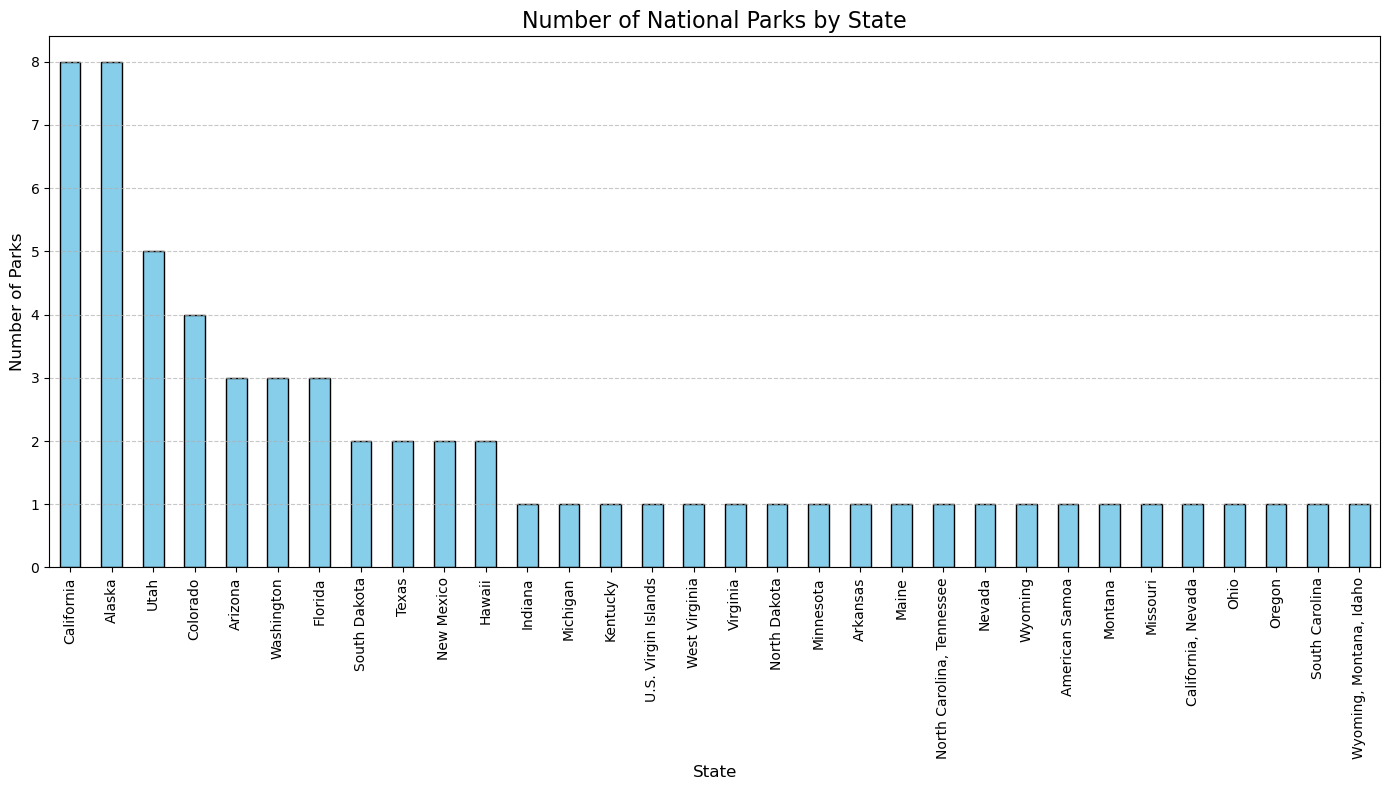

state
California    8
Alaska        8
Utah          5
Colorado      4
Arizona       3
Name: count, dtype: int64

In [42]:
# Count the number of parks per state
state_distribution = df['state'].value_counts()

# Plot the distribution of parks across states
plt.figure(figsize=(14, 8))
state_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of National Parks by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Parks', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Identify states with the highest density of parks
top_states = state_distribution.head(5)
top_states

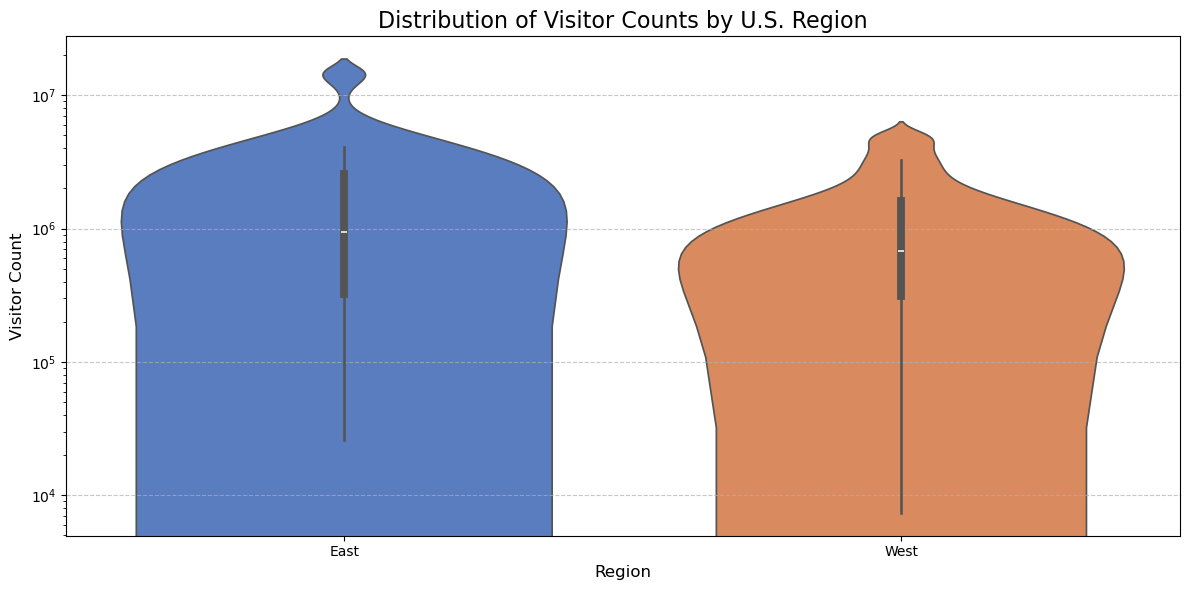

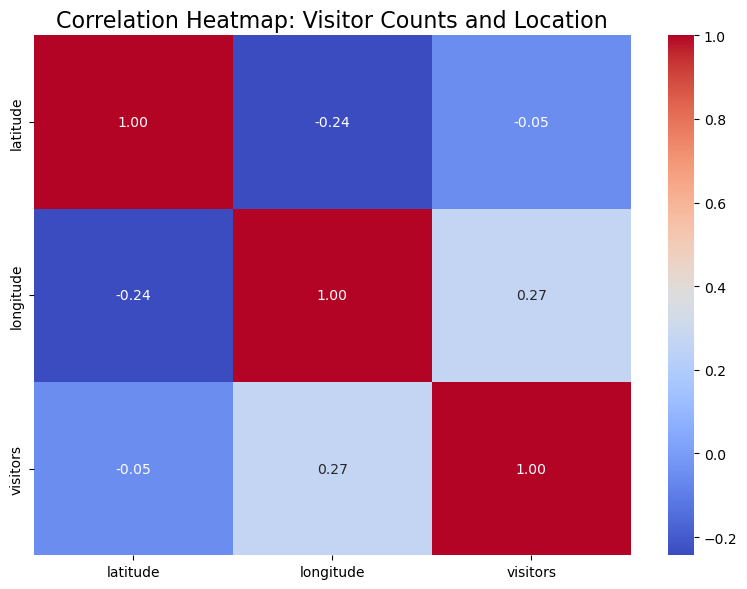

In [53]:
# Violin plot for visitor counts by region
plt.figure(figsize=(12, 6))
sns.violinplot(
    x='us_location', 
    y='visitors', 
    data=df, 
    hue='us_location',  # Assign the `x` variable to `hue` #thanks chatgpt (was getting parameter error)
    legend=False,       # Suppress redundant legend
    density_norm='width',  # Replacement for the deprecated `scale='width'`
    palette='muted'
)
plt.title('Distribution of Visitor Counts by U.S. Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Visitor Count', fontsize=12)
plt.yscale('log')  # Log scale to handle wide range of visitor counts
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Prepare data for a heatmap (correlation between latitude, longitude, and visitors)
heatmap_data = df[['latitude', 'longitude', 'visitors']].corr()

# Generate the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Visitor Counts and Location', fontsize=16)
plt.tight_layout()
plt.show()